In [1]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the data
iris_data = load_iris()

# Turn it into a DataFrame
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

# Add species names
df['species'] = pd.Categorical.from_codes(iris_data.target, iris_data.target_names)

# Show the first few rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
# Check data types and structure
df.info()

# See if anything's missing
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [3]:
# Basic stats
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# Group by species
df.groupby('species').mean()


C:\Users\aresw\AppData\Local\Temp\ipykernel_96048\2886357038.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('species').mean()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [5]:
df.groupby('species', observed=True).mean()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


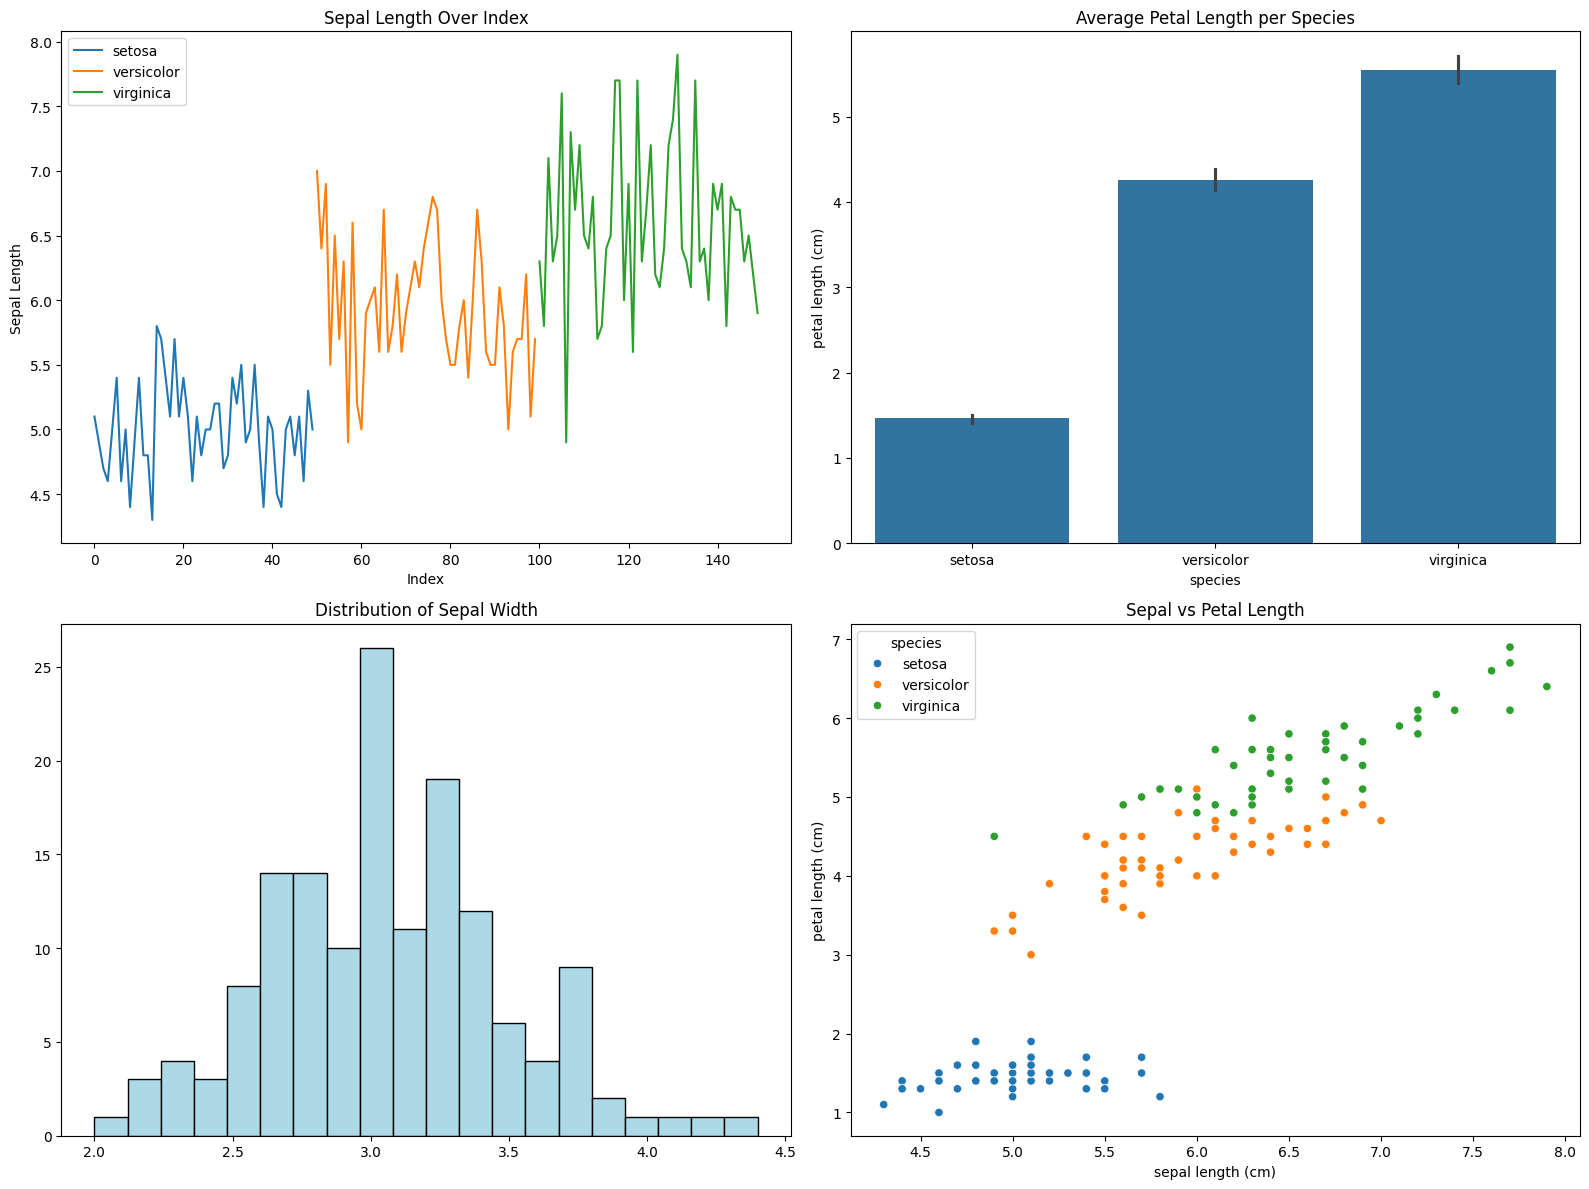

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line Chart (Sepal length over index)
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
for sp in df['species'].unique():
    subset = df[df['species'] == sp]
    plt.plot(subset.index, subset['sepal length (cm)'], label=sp)
plt.title("Sepal Length Over Index")
plt.xlabel("Index")
plt.ylabel("Sepal Length")
plt.legend()

# Bar Chart: average petal length per species
plt.subplot(2, 2, 2)
sns.barplot(x='species', y='petal length (cm)', data=df)
plt.title("Average Petal Length per Species")

# Histogram: sepal width distribution
plt.subplot(2, 2, 3)
plt.hist(df['sepal width (cm)'], bins=20, color='lightblue', edgecolor='black')
plt.title("Distribution of Sepal Width")

# Scatter Plot: sepal vs. petal length
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='species')
plt.title("Sepal vs Petal Length")

plt.tight_layout()
plt.show()
